<img src="../biospytial.png" alt="Drawing" style="width: 500px;"/>

In [1]:
## Import modules and libraries
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import numpy as np
import matplotlib.pyplot as plt

# Mosquitos, the environment and related species

<img src="mosquito2.jpg" alt="Drawing" style="width: 500px;"/>

## Load Biospytial Modules

In [2]:
## Import modules
from drivers.tree_builder import TreeNeo
from drivers.graph_models import Order, Family, graph, pickNode
from traversals.strategies import sumTrees, UniformRandomSampleForest

## Let´s pick the Mosquito Node
Remember that Mosquitos are all from the Family *Culicidae*
<img src="mosquito3.jpg" alt="taken from: http://www.insectsexplained.com/11Diptera.htm" style="width: 500px;"/>

In [3]:
mosquitos = pickNode(Family,"Culicidae")

In [4]:
mosquitos

<TreeNode type: Family id = 729651 name: Culicidae>

In [5]:
%time cells = list(mosquitos.cells)
neighbours = map(lambda cell : cell.getNeighbours(),cells)
neighbouring_cells = reduce(lambda a,b : a+b ,neighbours)
## Remove repetitions
neighbours = list(set(neighbouring_cells))

CPU times: user 76 ms, sys: 12 ms, total: 88 ms
Wall time: 598 ms


In [6]:
len(neighbours)

39

In [7]:
c =  neighbours[0]

In [8]:
%time sample_trees = map(lambda cell : TreeNeo(cell.occurrencesHere()),neighbours[:5])

CPU times: user 10.3 s, sys: 272 ms, total: 10.5 s
Wall time: 15.7 s


In [9]:
sample_trees

[<LocalTree Of Life | Root: LUCA - n.count : 23- >,
 <LocalTree Of Life | Root: LUCA - n.count : 15- >,
 <LocalTree Of Life | Root: LUCA - n.count : 34- >,
 <LocalTree Of Life | Root: LUCA - n.count : 230- >,
 <LocalTree Of Life | Root: LUCA - n.count : 85- >]

#### Wait.. wait..
<img src="clock.png" alt="Drawing" style="width: 100px;"/>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=IkdmOVejUlI
" target="_blank"><img src="http://img.youtube.com/vi/IkdmOVejUlI/0.jpg" 
alt="Waiting music" width="10" height="10" border="10" /></a>

## Explore the nodes !

In [10]:
t1 = sample_trees[0]

In [11]:
t1.to_Animalia.to_Chordata.to_Mammalia

<LocalTree | Class: Mammalia - n.count : 16- | AF: 0.05 >

## By Families, Species, Genera, etc

In [12]:
t1.phyla

[<LocalTree | Phylum: Chordata - n.count : 19- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 2- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 2- | AF: 0.05 >]

# Monoid operations

In [13]:
# Let
t1, t2 = sample_trees[:2]

In [14]:
t1.phyla

[<LocalTree | Phylum: Chordata - n.count : 19- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 2- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 2- | AF: 0.05 >]

In [19]:
t2.phyla

[<LocalTree | Phylum: Chordata - n.count : 13- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 1- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 1- | AF: 0.05 >]

## Sum

In [20]:
t1 + t2 

INFO Merging Trees


<LocalTree Of Life | Root: LUCA - n.count : 38- >

### Folding (*Integrate* ) the regional tree

In [21]:
big_t = reduce(lambda a , b : a+b , sample_trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


# Tree subselections 

In [22]:
mammals = big_t.to_Animalia.to_Chordata.to_Mammalia.plantTreeNode()

In [23]:
mammals

<LocalTree Of Life | Root: LUCA - n.count : 101- >

# Get (Raster) Environmental Information

In [24]:
table = mammals.associatedData.getEnvironmentalVariablesPoints()

In [26]:
table

,MaxTemperature_mean,MaxTemperature_std,MeanTemperature_mean,MeanTemperature_std,MinTemperature_mean,MinTemperature_std,Precipitation_mean,Precipitation_std,Vapor_mean,Vapor_std,SolarRadiation_mean,SolarRadiation_std,WindSpeed_mean,WindSpeed_std,x,y
0,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
1,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
2,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
3,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
4,13.750000,4.866981,21.500000,5.008326,29.416667,5.024247,20.833333,15.715350,1.333333,0.471405,16706.916667,3430.710117,2.333333,0.471405,-103.44000,25.51000
5,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
6,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
7,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
8,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
9,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800


### Export to R

In [27]:
x = table.to_json()
from drivers.tools import redisConnection as rc
r = rc()
r.set('spatstats2017',x)
r.keys()

['Commiphora',
 'Bursera',
 'ncells2',
 'Terebinthus',
 'spatstats2017',
 'Icica',
 'Protium',
 'Elaphrium',
 'test_graph',
 'bursera_n_cells',
 'Beiselia']

#### Explore array with numpy

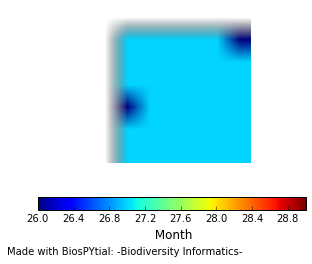

In [28]:
t1.associatedData.getAssociatedRasterAreaData('MeanTemperature').display_field()

# Rank co-occurrent Nodes

For this we will calculate the frequency of each Node in the big tree, using another list of trees. In this case the sample of trees that we've got.

In [29]:
big_t.countNodesFrequenciesOnList(list_of_trees=sample_trees)

INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 3
INFO Going deep 3
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 3
INFO Going deep 2
INFO Going deep 2
INFO Going

0.05

In [30]:
big_t.rankLevels()

INFO Sorting nodes in taxonomic levels by counts on frequencies


True

In [31]:
big_t.families[:5]

[<LocalTree | Family: Picidae - n.count : 6- | AF: 3 >,
 <LocalTree | Family: Parulidae - n.count : 17- | AF: 3 >,
 <LocalTree | Family: Icteridae - n.count : 14- | AF: 3 >,
 <LocalTree | Family: Fabaceae - n.count : 5- | AF: 3 >,
 <LocalTree | Family: Columbidae - n.count : 21- | AF: 3 >]

### And for mammals ?

In [32]:
mammals.countNodesFrequenciesOnList(sample_trees)

INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 4
INFO Going deep 5
INFO Going deep 5


0.05

In [33]:
mammals.rankLevels()

INFO Sorting nodes in taxonomic levels by counts on frequencies


True

In [34]:
mammals.orders[:5]

[<LocalTree | Order: Chiroptera - n.count : 27- | AF: 3 >,
 <LocalTree | Order: Rodentia - n.count : 67- | AF: 2 >,
 <LocalTree | Order: Carnivora - n.count : 6- | AF: 1 >,
 <LocalTree | Order: Lagomorpha - n.count : 1- | AF: 1 >]

# Graph analytics

## Convert the TreeNeo object to a Network instance (networkx)
### The depth_level restricts the depth of the recursion process.

In [35]:
gt = big_t.toNetworkx(depth_level=6)

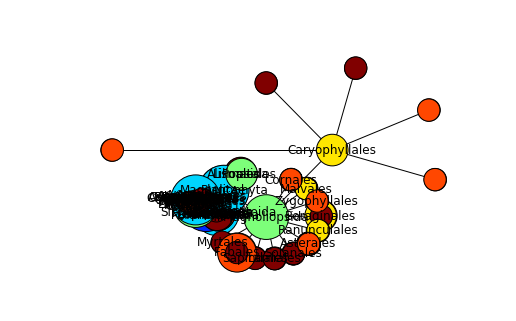

In [36]:
## Plot the Tree
from drivers.tools import plotTree
x = plotTree(big_t)

## Standard Graph analysis
With the **networkx** library

In [37]:
import networkx as nt
nt.laplacian_matrix(gt)

<292x292 sparse matrix of type '<type 'numpy.int64'>'
	with 874 stored elements in Compressed Sparse Row format>

In [38]:
sp = nt.laplacian_spectrum(gt)

In [39]:
sp.shape

(292,)